In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image,ImageStat
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
import random
import pathlib

In [2]:
images = pd.read_csv('images.csv')
images.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [3]:
images.drop(['sender_id','kids'], axis=1,inplace=True)

In [4]:
images.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes


In [5]:
#Add suffix '.jpg' to all image files.

images['image'] = images['image'] + '.jpg'

In [6]:
images.loc[images['label']=='Not sure','label'] = 'Not_sure'

In [12]:
from matplotlib import pyplot as plt
import cv2
from sklearn.decomposition import PCA

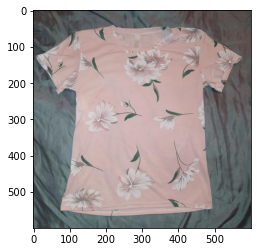

In [8]:
img1 = cv2.cvtColor(cv2.imread(
    '/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16f1fbdf-d339-40f6-aecb-e55199db7a96.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

In [9]:
img1.shape

(600, 600, 3)

In [10]:
#Splitting into channels
r,g,b = cv2.split(img1)

#normalizing 
r,g,b = r/255,g/255,b/255

In [13]:
pca_components = 50
pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reduced_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reduced_b = pca_b.fit_transform(b)

In [14]:
print(reduced_r.shape)
print(reduced_g.shape)
print(reduced_b.shape)

(600, 50)
(600, 50)
(600, 50)


In [15]:
combined = np.array([reduced_r,reduced_g,reduced_b])
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reduced_g)
reconstructed_b = pca_b.inverse_transform(reduced_b)

img_reduced = (cv2.merge((reconstructed_r,reconstructed_g,reconstructed_b)))

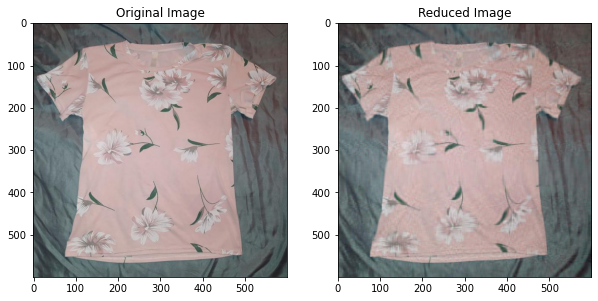

In [16]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img1)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [20]:
def image_PCA(inpath, outpath, n_comp):
    for image_path in os.listdir(inpath):

        # create the full input path and read the file
        input_path = os.path.join(inpath, image_path)
        print(input_path)
        
        image_com = cv2.cvtColor(cv2.imread(input_path), cv2.COLOR_BGR2RGB)

        #split image
        blue_2,green_2,red_2 = cv2.split(image_com)

        #scale channels
        w_blue = blue_2/255
        w_green = green_2/255
        w_red = red_2/255

        #PCA on each channel
        pca_b2 = PCA(n_components=n_comp)
        pca_b2.fit(w_blue)            
        trans_pca_b2 = pca_b2.transform(w_blue)

        pca_g2 = PCA(n_components=n_comp)
        pca_g2.fit(w_green)
        trans_pca_g2 = pca_g2.transform(w_green)

        pca_r2 = PCA(n_components=n_comp)
        pca_r2.fit(w_red)
        trans_pca_r2 = pca_r2.transform(w_red)

        #merge channels after PCA
        b_arr2 = pca_b2.inverse_transform(trans_pca_b2)
        g_arr2 = pca_g2.inverse_transform(trans_pca_g2)
        r_arr2 = pca_r2.inverse_transform(trans_pca_r2)

        img_reduced2 = (cv2.merge((b_arr2, g_arr2, r_arr2)))
        
        print("Merge Successful")

        # create the full output path
        fullpath = os.path.join(outpath, 'PCA_'+image_path)
        cv2.imwrite(fullpath, img_reduced2*255)
        
        print("Successfully saved\n")
        


In [21]:
inpath = '/Users/mahejabeenabdul/Documents/270 project/images_resized_f'
outpath = '/Users/mahejabeenabdul/Documents/270 project/images_com'
n_comp = 50

In [22]:
image_PCA(inpath, outpath,n_comp)

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d7ed1d64-2c65-427f-9ae4-eb4aaa3e2389.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5c1b7a77-1fa3-4af8-9722-cd38e45d89da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b2e084c7-e3a0-4182-8671-b908544a7cf2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9d053b67-64e1-4050-a509-27332b9eca54.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d885f493-1070-4d51-bd11-f1ec156a2aa7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/87846aa9-86cc-404a-af2c-7e8fe941081d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/22745622-ae32-407f-9af1-9a25eb79d7b3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabd

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c7c4406a-1681-4f7e-874a-b6eb77d27044.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6d08108f-89b2-4b59-afba-8f85892bffa7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9a7ca413-4c0a-4800-8f08-95e491336b4d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/59633c7c-cbdb-407f-97d8-d59fdd57f120.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cd6ff00a-3441-4977-a35b-7935cd4331c0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c3390c77-e055-4a94-9f09-e8e9750192eb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4338519e-515a-46e2-8443-4d3213426d2e.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/79484440-534b-49a4-9f0f-75593bad3eca.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/78d2f207-515d-4252-83df-7a3a4fe179cf.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/27983c13-54bf-463d-84a6-94ec799b70ab.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f4b934fc-e326-4f72-b535-53288b8b82d3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e73115ee-f4ea-4bc7-be9a-7c030264f7d1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e5f6e679-cc48-4ea8-920e-670aa21ca0e0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/78534d30-3cc9-409f-a8be-903f5864af3f.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/224eaa85-6c96-4a3e-8f07-2612e569cb2a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d827bf33-e405-4a04-a401-a2fef1bd75f1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4acdd295-b0b4-4991-a6cd-c9d2c322c347.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f593d176-6799-4ae4-8d9e-19256cbcec7d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f7ffc2ea-400f-4965-b989-0b755b9db198.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/75861e58-b6fe-4008-a3e7-316af2e44354.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ece02457-3fc5-4c18-a4be-d8eaf67e0448.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/027c81f2-c6e1-498a-8f69-823ce631438e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9a75f3e5-4530-4df2-8527-9d3b3943be18.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c477c3e8-540a-4e1f-a100-605ea827f192.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0b7dc2e9-a9e9-46ed-b4e2-8b91e1e720b0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8446595e-54c2-4fe2-a8a4-afe51874bf1b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5251cfee-29b7-4e54-af1e-b15990c7bb4d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8388e858-234a-4a99-9d7b-146250e964ca.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/446df066-edee-4c69-90d7-5013bcc72cf2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/17685bbe-8548-481d-a482-d1b75ffb01d1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8d1cfb8d-6e6c-4dbe-999a-0272d986f901.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/395c39f5-dd23-4fb2-9e3a-78726081d909.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fd680055-a909-4c5e-adf7-cb071d63148f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/04b42565-23ce-47d9-8f11-e3f1fb0d5051.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/981790c1-17b1-42c8-b446-aaa593c8f408.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7a8a13c4-327e-45a4-94d9-6366d4cdf4c2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/53a09aae-ea3a-41f4-b665-cdacc930b021.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/873dcf11-b2bd-4684-81ec-93398406d0fc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8b366b95-1958-4b76-a9c3-f8195f589499.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/540febee-92d4-494a-b453-84d670feebe5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f6da26ee-d8a0-4086-b508-0da9c5cde1cc.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7b9bdb6d-e380-4f48-9bc0-e3233a556849.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1ebfca5f-6b3a-413b-851f-b09c145817a2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e43c414a-f5fc-456b-b11b-60dea7c6b2ec.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/18cba668-3d06-4583-8d8e-9471cbf20510.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/89d00f6f-40c7-4ff5-a84a-11569f86cc72.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4e72af53-2177-412d-9ec7-4da9c8793381.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7231edea-0db3-491f-a8c8-69143254073d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/548cf305-3a9a-4f23-8939-578d957a680a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/223939a1-c2a0-41c7-8956-fb1b6370ebeb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00143901-a14c-4600-960f-7747b4a3a8cd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/883a9a8e-3e7f-4909-bf48-64a26d91789d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3d9c818a-0a13-4594-b24a-07ba9ae0686d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d7922d25-98f8-4d89-a6ac-a596397f2eaa.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4285fab0-751a-4b74-8e9b-43af05deee22.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9e27ae62-9bdc-497c-b8cb-745252b6c232.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9fce2963-b204-4865-be6f-99b512b31d39.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ca89967b-ecb5-4037-9d8f-6e029e670d8b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bfb69b55-3621-4f2a-aab5-bae002a7be1b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a353e037-381a-46a0-b0d6-10e1f1a7ebbe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/35831927-8ab3-4920-b701-86f17c65bbfc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/13def0b2-758f-4640-8563-15809bd8abf5.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3c5ff556-36e1-442e-8ae7-1b836067916d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/730e1eaf-3cb5-4a15-90f2-bd58e21eeb90.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e204f303-cd35-448f-b7cb-791b133efa4b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a685a9b1-c4af-4302-be13-27ef25d178b5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c46870a8-412f-4fa6-8e37-b42f9b025782.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fc1241ee-8540-4321-ad77-6dfc2dff7802.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4c60802b-fe0c-4cc8-a36e-0c6bde058bea.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5ca1e689-1dae-48c3-9b8b-b47a3365cc01.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00d94e21-5891-492e-be0e-792e7338c077.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/54c2556e-de9f-49ca-b266-e01b642e6922.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/20e5a129-ac26-4ec2-9bf1-f63427503929.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/159d517a-cae3-42ca-b92c-8ba57eb7d748.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/210135d3-adf9-45b4-bb33-915370af2942.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/65d02d4c-f473-4221-8b36-80041ddc9dcb.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ad19b17f-66d9-4f5b-8a90-9539f0311806.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/51ec2329-7f56-4cec-ae5e-a40b7f79268a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8ced139b-54b8-4d7a-b40b-b4cc303bdb62.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/51efa1c1-991e-4f4f-bc07-76a879dca148.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1aac00cd-b42a-40f1-a82a-dcc44a0879d4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/605e9fb8-12ad-4da2-9a8c-07cf0cbcf158.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ff7d4f3b-a8ef-414e-a1ac-8b9527264f5b.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/725b050f-1d89-4411-84b6-bd6d14d1f3d3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2c23a71b-166a-41c8-89ed-e6043c7a4cc8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/caac1987-574d-4975-9c36-4e3ba7dcaeef.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5a840d5b-f861-482c-9ea3-fc7a30f4834b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bca2c322-fe54-4240-8027-0c49ef6a7e74.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ceb9e75d-b804-472e-9869-98b2c698b370.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00149032-3dd6-426e-9bc0-d53032536a42.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/25812699-f609-4db8-871e-a86a11fb3afc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/79e3574b-361d-4c3a-b311-85c4ee1e784b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7d565210-268b-4ed4-a729-bfa4b9ba163b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/92af39a3-3cad-4753-9818-b83bf03c398b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b9549600-56ad-47ac-adcb-82ca5881dcae.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9007ff00-66fe-4967-8ca2-9d305675ca1d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f6101867-7e1c-4fa1-850a-8e4f16bd3846.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e4c3516f-4480-4e30-919d-dc735243f923.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7260d25c-a1ca-4b3f-a6d5-d9e8b3a69d34.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/579227a4-f635-454e-8b9e-a1e72b03acb6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/82dee9a8-a859-45b4-8214-16e10b615b17.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2d2b50e7-cf87-49fb-9981-c0e364005332.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3d7484b1-69da-4e8d-924b-34dba9083e73.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/58aaf4e2-5a92-4c59-9321-6b37e65dcc46.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a3e47bc3-ba2d-480d-a2bd-1c9d2c96abd8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00f4bb77-5cbd-4c81-98b5-42647b8d0c64.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7f17b410-d375-409e-b5b3-010122df5748.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/eaebcbd6-c54d-435e-a679-13ca18e96e4c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d356b8a6-b8bf-4666-81b9-a957aea03f98.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5d365198-b2e9-404a-b160-58248c136ef3.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/006a85bc-8a95-4cd3-8c8c-215b53753abe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a59f077d-a9f6-4da0-af7c-ff619cdbf8d7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cd505f3c-ec21-4aef-adfe-ed8d8267cbcd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/029f9205-bc0a-4083-b13d-581bb8cfed9b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bfcfaab9-549e-46f8-bbb7-7355d9fc58b4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b09b92a8-4e52-4ac6-946b-6b8fbf83898f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/abc109d6-6bb8-4772-8258-6dd92d9d86c1.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2362285c-34bf-47bc-a40f-4f324b85f72d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3200a3bc-bd71-475d-86b1-9ff9a4315340.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4068d0b4-56a5-4108-85c4-7c48c201147f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/74a793f8-243d-461d-892f-b52b5bb21f9b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/37249632-2876-4cc6-b689-49a6b2c3396a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/03b6a549-653f-4a4a-9820-8357c7eb5ae8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/358457f4-e6c1-4a58-bbcf-09b5776e3c51.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/209754b1-a016-4120-b20c-1354080422d7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/87c21bc3-8446-4b44-ae6d-a7d050016394.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/51c73057-ed52-4bf3-afa8-34a015301565.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/672b0d76-2277-4edf-8903-51cd6646b139.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a79b1490-9991-4b13-9147-c952c1297563.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c3ebfb65-451d-4192-92f6-29d06875898f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/19ff0603-c52b-4d27-a9b9-cfd9da5e9f35.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c6256f9e-0ba4-406e-8143-96c174983f3a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c187a68a-1eb2-416e-ad52-52012ec90122.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/63a7c9dd-6f90-4e94-b94f-b487b93bb82c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f60f4649-b463-4585-aeb2-e0d192b968ca.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/db398f2d-24a3-4af1-9816-c269709a48b3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8b8563c5-9eb1-4c44-9d52-acd22a8fe25d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d47373ee-c527-43de-831f-f8006c109476.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/442b93ee-a08b-4bba-8a89-35d8453cf2f5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3b67cb0e-eb7c-4f4e-a67a-804ae460932d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e789e54a-cc2c-4e20-9dda-df90e832099e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/75b7e88f-093d-453a-9238-a91e18ef80f5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c9396902-a4c2-4bc4-9e1c-95aa8d920955.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b076b1c5-4426-46ec-9e15-4c785586f1c9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a5c1c9a1-dc9b-4224-bb86-5141922772bb.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7fb44e44-48e0-418c-9f28-695cf29997ad.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6c86fcb8-3bb1-4b70-bf96-b756b992a9f9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7ac347b0-0147-4f0e-8174-c40177d53287.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/09cd286c-0fab-45b9-9152-322f32275ef7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5e0c1b76-5405-4192-9dd0-3b3fd46060a9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/95dd0618-9a05-4abe-853c-fa6c3fa9bcce.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a0cfdcc7-74f1-4189-b2e6-82ceb9c41085.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ab7a19b9-5387-417f-8294-8d976dfa948a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d2db3c6a-605a-450c-b21f-dc5af1a513b1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/be5eeec0-ce4c-4f0e-ae48-fb3b56d6aa52.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d5bd0641-fa5e-4757-ae93-000a0439fd38.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1b499ee5-b290-43d5-ae17-05d5b38c4f9c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8afc8664-98c3-45e2-a9b5-38fcfbc32699.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/758657f8-11c9-4259-bc9d-82e573c05bb3.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ad517de5-8aad-4bc1-abf7-1ed07bd78cfe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fc817326-6130-49f1-9646-4ac8e10e8553.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a9884da7-fbcf-4b78-9750-479eeac414c6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7c5d766d-a300-4a89-8d60-e9bbf6bd3717.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/50cf0bbc-5a25-4df9-94fe-3323d2b61bff.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a764708c-5dba-4722-92ae-4b3114dd316b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/527fd818-556f-420a-8fbd-8bea64dea5a2.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4c08ecd6-faf9-4dbb-ae7c-d66a880389e0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/35e0e4a4-8f48-460f-b6ce-d87e94dd267b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d4d57319-3c65-4b8d-b4a2-4c1e185933ad.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c4a88052-fc60-4686-9297-8ae33d0fcaa5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/02543402-d766-45be-a111-29d387e04e2f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9ef2b0b2-bf6f-4544-83eb-b69f785561c6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b7869275-b3e7-4af3-a86c-871e1c044866.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1b2a7169-fb57-4b9e-9990-ae92a02305a1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/601199d6-dea6-4cef-9178-e341f8b44649.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/973b5b65-72ef-41b4-8290-0ee84dd44bce.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dcc9ba78-0c23-47aa-8c87-f3285a5cb5f8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/725f2fc9-230b-4bcb-807b-6a757cefdf37.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f5f2bb4a-5aa6-49c3-b0c9-d13348d43bcd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00070a23-9faf-4682-8243-59f307880f4b.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d4909b5b-faa2-4ae2-81a6-72d272a918da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/77117568-170e-4fa6-ad38-ba45bcbbc848.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f799a68f-786f-4c7a-84a3-37f178faa418.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4014f464-8bd5-4425-b934-735630cce566.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/47ea331b-d59b-4043-9b35-6ede8ba7c194.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0fd66046-0879-42ab-be2e-a919c8a82aab.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ebaf0af5-c378-4fad-ab85-f53f53496ff5.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/84b71d2e-7ee3-4f48-9278-5e49e1b05eb2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/047b4988-aeb2-423b-8a2e-163477a6cae2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/491982c3-3e90-431e-99e6-b14ecea36384.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/88eff37f-2eea-4a6d-a4fb-306341d70e7c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4976873a-5058-45f9-b994-3d79868533a8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/99df5351-ca44-4291-9fc6-844993b24280.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b61b9f26-f5fd-4b47-9edc-f27bd6d1176a.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5081e6b7-d883-4302-9806-4095c90620c8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7b829bc4-fe3f-4fc8-980f-1a3958a4cbe6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d7e2ad1c-e998-479c-ab3a-7500a29e9f90.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b5b06bb1-7888-417e-b3c4-0a47569b18a2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/40cdc4d8-61b5-4b1b-bfca-4a34541abddb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/248e4cd0-d007-4f0a-827b-291f29ca06ae.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/29e0414f-80ca-432c-a9c0-3427298c245a.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9767d117-3c66-4cac-a778-5ee3038ebfc8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/507e8a1d-3f45-4aa9-b4a0-cbc159fa5a79.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3c4bedd6-1073-4d9d-bb06-031f865f0846.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1e9ba1e2-eefe-4853-ab05-63598cb144f1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d011f05f-6f9b-45f6-be93-c8e1bd0013aa.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8b2f6c39-2726-478e-a489-cb02a7bd1b7f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/58e51574-d451-4a2c-a5d4-c6675781cb54.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/879432f4-b4b1-416f-a03d-2477556027da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4321f0c4-51f9-44e8-9d9e-149515ac16dd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/44ce6ce5-d4cd-41cd-8320-a6bec19600c2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/027a10cb-97f0-46f3-b670-611e481bb8fe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3175a932-43ce-46fd-8599-37f375b1f776.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ccb57961-f839-44fc-be22-8b8a5944f8b3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/390960ff-3a5f-4e8b-a025-f967aa2a435b.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3da1c365-4f2c-4411-b34c-f0247232fcd7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bf5d5e96-dcd5-43c8-967a-be341517c6cd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ecdc68a9-12c7-449b-ab3a-4b2a8e71b197.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1ffb85c6-dbf3-4a01-8e62-49c0be6f0d59.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/49cf6cd7-48aa-4ce2-9bb2-36edae7eace4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b765f11c-24b6-4036-ace5-f35f721155a7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/372787ed-7a3c-42b5-87b9-91c28567eb72.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7ee4c64a-2540-4d05-84c2-4c6de40aac26.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/44bf7760-a7c2-41c2-9eb4-1d12bd5c235c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/63bb7722-a838-45f6-95be-4a9993373426.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/adeda6be-071b-4480-a0f2-022ec31692e1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8e0180ca-68ec-4c04-8283-ad6a0ce6292c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8519abcb-e9e7-44ba-812f-81ece738126f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bf9798e2-0461-429d-bbf7-145b4f9aff15.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/877eebfc-1de1-4009-8362-e289d2891dea.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fc05b015-b14e-420c-bdd0-1ce171fb143a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/66807c84-da44-4af2-b9be-3848a52a7073.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/923d98e5-ff69-4b81-a16a-3fd3571a9a4a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c5b49a04-f4c8-46bd-ab2c-ccc65a1b6308.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b3863deb-1939-4406-97a3-f753914bab33.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fe9bcc3e-f381-4243-ac65-d1a4fd29b70f.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/feee742e-73bc-4c84-87de-3bc2f4daacf0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a9db59ad-5a9c-4c5d-9a5a-a8aed629cc23.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/05e3ce4d-237e-43c5-be5c-20f1a11280b2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cd3e5c86-c3e3-46aa-b7fc-9c825f7fbfd8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8f2de04f-c93e-4261-9545-690a1bf5ab9f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c777dda3-609e-42bb-b873-5f17a5e371ad.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/802451d1-e9e5-411f-acf7-5d9fe2f0348e.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bac70656-a50a-4a13-8c3f-63e3a0a28338.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8e3553a1-859e-4e56-a7b5-154a0b1c2c57.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/33bd8f87-ea14-4360-a980-ea4ea748c929.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5089843a-ecf8-4cb6-8f35-587f19125046.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/15fa6bbf-0f73-4b27-9824-87d78eb9074e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/248bed38-bb76-4d26-a510-26afa75dc811.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6b825ceb-4d84-4fa2-8953-af936b3233ac.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/24963db3-649c-4f04-8da3-0375ede8e0a6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/560259b7-b345-4801-aea0-ec6d0049c9e1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cc741d65-c8a9-41e5-bf14-a7bfbb29a5fd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/70b7155d-0a71-4d47-a270-29be523d8800.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f3f85e68-f01f-4cdc-b2dd-13e1755c6bbe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7882749a-5565-4c6b-ab4c-52d871babcc5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4e6276b7-564c-4a32-9218-13cfc9148263.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/097abdb7-f064-4cb6-b2e9-3c0b8dc1646d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/984b613e-a489-4acb-bb29-de2c25a5b4a1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0373fc11-3fca-4b92-8ae5-e208d53135a0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/11331826-e5c9-461d-acd2-b078022a9146.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/047bf1cf-28e2-45e2-a96b-cc3def23f030.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e7bd3b87-668e-40d6-9a4e-685cfc9da436.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b19ddf03-3733-4a08-b600-6125e2202cde.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ff8ca4c9-b3dc-4d84-8dba-095581f94dbe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/16269b50-4756-4086-9dbc-32f0bf9fd1e3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9e578f34-a6df-46f6-80b0-1dfd30b7fa36.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e2dd7cf5-e947-4f6f-b8c1-5014322954b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b5c9449f-f1fe-4b81-a247-329145b6c277.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/95d51b57-f70c-4f37-a874-2028a7fac49f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5195e000-d919-4ebb-81b8-1e646224d231.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/04f0b07f-4b9f-4c55-bc5d-b693658fb32c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7a26c192-63aa-4516-bb29-b0c52ed87a9c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/598fb3d5-2ffc-44f1-af7a-1346edafc364.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0fafdb51-781a-410a-9e9c-165ed9d99f64.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f8807d97-9281-437a-85b6-b6e3519f72c9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/269b0112-55b0-4c95-8f9d-45c32911f202.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a18f1511-770a-4900-b748-691c6021a3b4.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/35a934e2-1683-442c-bf2a-ffa0f47a91b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8b719bfa-919d-45c1-a83e-86ceec917c41.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f1f2c7fd-c9ad-42cf-94a9-b6b1312ed678.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/69c6cb91-303a-4d42-be28-0a4e6666b39e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bc5487b6-c695-41c9-b2a9-62df4a83c387.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e3f2266a-49db-412e-99ab-a57cb0b226e7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cbca741e-3bae-4ecf-9b5a-aa4d91d5dea1.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/41302a0b-5faf-48a9-9b40-33885d28a7a6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d5b1aadc-1210-4e96-a14c-8e6a4d88f810.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/db7b1bb1-f405-4c45-978a-958e02664a4d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/01e4ab4f-6148-4dd7-9a43-df7681fbc71d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/685c4f76-0ce0-4dc5-8918-f2335ba7d18b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/60254e3e-1b19-4a58-b8df-cbbbc45c8109.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c3ebe8e9-dab4-4e9d-aa83-d9e8a1fcf393.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9fdf4d40-5e5c-445a-ada6-bd87925609ca.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8b828fda-ff6d-4b9c-ac41-ed2b9c58a905.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d689b01b-8d53-40d3-85bd-074805eea444.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5de6404c-9a31-4d1e-b3fc-f747e31d19bd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4cf67efe-100e-4174-9772-ffc9d644deec.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a908213c-e35a-4f9e-89eb-47918afe8191.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6cb6102f-cf2a-4b60-8b44-97e8b8e1e4f2.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/230ee7f3-a206-4804-9c23-8b5bda052140.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cfc50433-e50a-442b-b7e0-273e17a4edad.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d751b525-4de4-4041-bd16-5c97496a9773.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d0a1b45e-f6d3-4402-aad1-e921b9ee3589.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/df002747-cc0a-4340-96ca-ead83cad11c0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/276db6ba-6a50-499f-8a3d-7ede222493df.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1eab35b4-7931-4cf6-8768-509ceee15308.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7c1be029-c26c-4628-9579-a043592532eb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6e2d32e4-c284-4245-accc-e3cb0b5a57bc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f5ed50b6-79b3-4d9d-84a9-8010f5e1c581.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5b62c0d7-d046-4b73-a61f-3dec701ad622.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6c2f3d48-8f30-487e-9244-ba65c5110a8d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/455a4889-5b1d-41a3-a16b-d540aff1f2c6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c367894c-253b-4289-99b4-f045133b60fb.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d378d693-740b-4304-be42-d44c057e92ac.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cb3838a8-f6e4-4845-8140-51ff740a75cb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/059c0eca-67fc-4357-8969-28de775d3eea.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/562fcdc1-cda7-40cd-bb7b-9b2c908d0931.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3646d5d0-76d6-4a8e-bfa4-f00ff7a41824.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/41e11790-a772-47b1-b251-15c3464038b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/82d149a0-7102-4382-886d-797eb011467b.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7253c29e-932d-4669-b834-e3070730f788.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3efdcf18-90e2-4ccd-be4d-5754d0d4f101.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ee4d62e7-6dbc-4131-a394-c199fa564250.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fb18aa4f-0f3c-4e14-bf75-7593b010914f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b9db8288-809d-4f55-b254-446642821458.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9e996161-5ba7-433a-a50d-2b0e871ded74.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/39386bf9-17e9-448b-994a-f487d527bedc.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b94ae406-239e-45d2-a40b-1ec2fb0a8d17.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5d94204b-a739-4e8f-8f61-8b896bd20913.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fc33993c-6696-4a4e-be6a-dc6f5c08eb09.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/214245bb-8308-4981-be30-4f82e4766607.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/44640d54-24a3-4479-b33f-56bc476376da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e1243518-e811-4662-aabb-c2fc5f7d8151.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4e8edac8-e81c-4e2d-b0aa-462837a42c55.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6e01bb22-131f-485d-a9c6-d45180584137.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c1d0e41f-8144-46d0-b9af-9372e2115b66.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/94287d7c-aa4c-4dc3-b728-0a239badefb7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9746d8b6-4d9c-4ad8-b8db-9bbd76dc6961.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ac280aaf-105b-4d1a-b716-8c1a2e99542b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f8b7bdad-76ce-4efc-a26c-6a9d625d91fe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/484ac9ae-b44b-4219-a58f-3911481c2e9d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7e08bfd5-248c-4905-ad23-4c347d16037f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/535730d9-abf0-428f-8f2f-b0c10591b657.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/abca462f-8bc7-4f21-972e-0b5326043712.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1c3deae2-1e34-4b42-b4e2-4932937481a9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9733514d-5fff-4f71-a07f-10cdb1a19d4d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bf48fa4a-8427-47e3-a802-08f758b71e70.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/44adf0a2-88dc-4dfe-a18e-f149386fe0c3.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/43d8bea9-3415-44e8-9245-987745ebca97.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dc14465c-cecb-48e4-8ef0-49914b2a9d6a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7fef30de-564f-4293-b3d8-a30b1872268b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/84ae684a-cb1c-46e7-ba47-b6519e4f0d51.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/14a73972-d3a6-430e-8fe1-8e6911e40371.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/653bd2fc-4011-43b0-873a-f0e2330adec4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/011ecf12-aab1-4c72-8f77-2649386cd23b.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c231b5c9-1886-469c-aaa4-14e9caf4252d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/81c98fb1-2f1f-46aa-b60b-b330fc544c7d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/721e4f5c-a733-4230-a3ce-fe350908b0b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/78043895-d366-406a-a5a2-18d865e87ada.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f1c78283-2da0-45fc-8f20-4f874519d415.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1dfed9b7-d0c3-4c6b-aa8b-e827b3558c0c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0c6f89cd-30f6-4b44-bda5-0ba8d90e6717.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f6f005a3-2dcb-4b1f-8a85-b60ca0cdc29c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e360d7df-90fc-4de0-bc17-e8924cbe7222.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7a09572b-9cad-42b2-a19a-a64a5bddd371.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6db59125-aec0-4fd7-aca6-337a28277e44.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/146d59ff-931a-4997-a699-d27c062135fc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/330f1f98-0d3d-4c64-bd82-518e6e157d08.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d9218439-14f1-46fa-8c35-f17f112b08fe.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0d73e759-eeaa-43ab-98d4-196b6974c41e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c0df1d55-2d24-40df-8e08-c50fd4f5dca7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/df8283c4-33a7-4bc3-b2ef-2f9c62b15c18.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/14bc842c-60e9-468c-ab35-5089143945f5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/36f8376d-99b9-4349-9a0a-9731897c15da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0ed80b93-67c9-45bc-b16d-d926b79b9782.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/980bcf05-03b4-4628-806e-fd141f92fe82.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3649576b-eb83-488d-afc9-d459191ea011.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/041f59a2-37b5-4f23-8ca7-b08617f67d6c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/389bb7fe-02a7-4db4-9daa-1604b5ca8cb1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/31ae3916-c352-45fe-9866-a8947fc74991.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dd59a1f7-f21c-43e3-aa08-eff7414f2463.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bc6b2e06-d79a-4f7a-ac85-92196ce5ce4b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3a15b3b8-d643-4e94-bf21-81bbb35c773a.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9748e210-8815-45a8-9e32-46e3cdd779dd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bc6aaa37-0299-4a59-975e-d3dfb35a7a34.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5a011c0b-7f3c-4118-a64e-ed0d545600d4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/90a36044-7090-4bef-9159-6e2e3309234a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cc33023f-62c9-42bb-92b2-4630103c3f52.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/84208961-56c7-4be3-92aa-f8ae333408b2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3193786c-22f1-4ea9-9e84-8ee47c138a8d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/70d6fdd0-4a24-429f-a00c-dc946a90f9e3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/56877c94-71fc-4a43-a447-2c223e3fe4b4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/40ee6784-5c49-40c1-bf26-7cdbcc9ff849.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cb61ac26-e7a5-42a6-8471-66f69a9ccd4d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9fb6f6da-e937-458c-90e9-5a6265ae8b6a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/363e32eb-7548-4d71-aea6-c8b6a0cbb9a2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3434a264-2825-4e92-b731-3f02aa976617.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7cb63c2d-e427-43c8-bd90-c701f03b7e56.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5eb1d4ac-85dd-4110-a807-863cfe114c80.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/12bd3e49-352c-4800-ad09-662e2d49828e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/30bc07fb-6f63-47df-8e05-ffb232dff166.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/28f642a1-d171-4af0-8bcf-4bce9a2ff55c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e9607c19-d3fb-4797-ae2d-d03afca1b9ef.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/976ae836-d00a-4651-9456-4689c80b4a3f.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d8e945bc-b7ed-4077-ade9-9eb2641c30f3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bf8654c3-da26-4b26-bfed-9682675ab8b6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1c9f7329-6013-460f-8cc1-3c38eb4d9903.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cb479876-9852-45a7-8b69-32f6144cc5ce.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bf67fd60-a8ce-431e-949a-0d841957de4f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9d662e99-37a1-4e5a-a068-d38556d6c436.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9760ea86-277b-4291-be10-03141e3b1ecb.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ece50133-2a96-403b-b541-10daae586b01.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/48fb5ab3-cf95-4fe9-af1e-2c8e2cdf1cd5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/520086b3-e4a7-42d4-8590-a4a505bf6a49.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/45800d6c-a8d8-47d9-b61e-91a194ba49e9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/81b69e5f-336a-44f6-8a0b-782c4613c0d0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9bccf7a3-d461-44d6-ad9c-c59e86853258.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/81134ec7-58c1-4d16-bf25-aac145860e5d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4c471b57-0825-4544-8bc3-6ec241c2baca.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/db7a1226-8044-48be-a4ab-08554aeb19d0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fbe119df-fd65-46c0-aab7-f9f5de8878bc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7ec26447-d556-4f0d-948c-d95ddffcc8a0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9edeb8a3-c80c-4dc7-b9a6-405cbaf4e2b4.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3108045a-9975-4ad8-b5ed-e0a065e5d397.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/87494101-57aa-4ef2-80d5-58d390ec72db.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/860ce7db-2433-4a5a-81fb-2251c79abb04.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/93b76dcd-ab9e-48cb-94b8-0209acaaa223.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2df565b9-1115-4dc7-bd4a-060f9490a8fe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0ba2d892-a1fb-4961-88a8-d77875b9f673.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/eaf87a18-8d62-408f-81b9-f22ecf14e34f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/43b4bd38-ab47-4ebf-8862-0eaff744b047.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3ca5dd7f-08c6-4be2-91aa-3a2c56d59bbe.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a050c7c8-af4d-4948-98c4-b5b1715cbd96.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/30b6fd9b-d172-4d5d-a1c1-c36d23f769dd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c8edb939-af9a-4776-96be-cabc164de820.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c60db3f4-cb91-4d84-831a-561f53976135.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fb5dd646-6a9e-4666-ab78-74b463431f54.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e64ef0da-1f58-4294-9a86-f698be8d8097.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c35bfc65-2006-413c-b50f-9806376c385f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/05a5ad6f-6a04-4d4f-9bd1-16f3c3485ec5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b8103736-7aaa-4161-9375-270b2148587d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/103926d8-d84b-4cc4-97c9-2bdb9b82f728.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a07fd5ee-6993-459f-b617-708f5ee533bc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6b7d9cb6-9096-4c45-8579-d2d8eb262839.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e580170f-d447-4d58-ac33-3d40b3771c8f.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8cf2e2b8-6ae1-4fd0-b3ba-dcf4407e6641.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a9f18738-4a08-4215-8063-c318287ac1bf.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dca6b87d-6ab6-4e71-9573-fc1a7831d38d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e97e3e26-c9de-4a66-95da-ce81c01fe1f0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c246ac1a-8bd7-4c22-a1a4-e141a239ef8d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/88eedb3c-fd03-4fc3-bb3c-ee0a77906a81.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dedc3714-6ac9-4d6a-b76f-cfa10a1a9a51.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ee093f3e-9fad-4bde-86e1-80b6bc79b732.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/77f4bce5-ee55-46e6-844f-0468075386a6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/356b217e-14c8-4b57-bd4e-9f4a90a50324.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/af7bd3e8-2826-430c-b074-85b8c0084c3f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/24c6e163-2b58-4aab-ac97-86422a51b272.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a59d261c-fc59-40ed-9c56-9bcf5d99fc9c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/262f0622-cc35-46bb-8079-927b51fc3607.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d174ca83-2d40-41c3-a927-dbbca88df372.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bad20a08-adb1-4903-af0b-7b64b32b8e2c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c1ab2b23-a769-47d8-a2ff-7d7842aa7996.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/690ebf34-a6be-4f15-9fb7-79c3d2c86b07.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/44b5af79-376f-4501-b1ef-e39ebca2a0b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/334c6367-375a-41e6-9ea8-1dbafd54e602.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/220cecbc-6cd6-48b5-a9fe-04c0875d8075.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f98d3a50-c57a-46ec-b313-437b97dc7507.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b6882578-b28c-49fd-9d79-1fb619957a12.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5a4e23a8-81a0-4009-9fa0-9e010b652498.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c3eaa0a4-4c21-4960-949d-3bfbbd99beaf.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/94fbfd0a-290b-4034-b788-abab0a3dd19a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9e61d8c2-aaf7-4d5e-b07e-804b082bcf88.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/adefd137-8fd0-415b-8139-f406e5f46182.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a896e9f4-322d-4fd6-84eb-42acc7e3c344.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/78a8a904-8108-45b2-b6d5-fe19ecb5a996.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4962d8a2-d6c0-4c8c-a166-ee1da756ca10.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b0d71fba-23a7-4912-b6c6-16b7d8a5bd43.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/143f9c1b-2037-4de1-95d2-1fb0e645c5a5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f1c715ef-6f8d-4410-b7b9-3f719ade8dde.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/39262aa5-eb53-4d26-879a-c0bdb560d7fe.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c4b9d4f5-2a30-481a-8cb5-51ae0fd189de.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0dc84ada-ef62-494b-8965-1a6fe28379c7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/914abed6-9cdf-4728-afa3-9d100efda766.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6cc3d16a-545e-49a0-922d-dbe014dac610.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fd1f8783-1118-4c87-8af4-632dbd46f0a0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c1c1ba3d-89c7-419d-b4a6-ad565b074333.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bfb145d2-ac67-4ce0-b193-747d0fa563a3.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/171437da-73a2-484d-90b5-9a0ce4b36140.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b88b9d84-7e62-4ffa-be92-854dc1804349.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/628d1234-90c7-41fd-b761-2697b5b528c9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6253ae47-c888-4991-a2dc-c484a98a7515.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d9024c75-93f8-4b22-aeff-f7966d924c57.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/599975b1-cf40-4fd7-ba10-da037ec968d8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/aafe2f1b-6257-44ac-b1ef-7c9ad90a64f3.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/68477f32-78c7-4280-a75c-d43c9c952176.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/eebe0c6e-611e-4828-880a-fec67d454ff6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bc13e811-2e4f-43ed-859e-80de2745ed12.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/58d54528-9eb3-4188-beca-892932f360a7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/73724d60-78b2-4bdd-84b0-a25d8c772beb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c9d2ebc6-f77a-48dc-bb9d-1700c6e9b109.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ed2917b0-98b7-444f-b91e-9cc35d544af2.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7fe5d50c-ff63-40f1-8629-f61937c859de.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/983a73c5-3aed-4e42-9286-47d5bd98209a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c7e911d6-833f-4fcb-a81e-4e6145abd3b8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ea0cfac2-165d-45ab-a87d-b34b7b1bdf87.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/03b5fa92-c65d-4b45-820b-967e85f41ee2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d573988c-b6fc-4851-8a3d-66cf16f7c470.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/98424108-fcd3-46a4-8a27-fcf4db664f4c.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b5f04763-399d-4293-b92f-0c5268210190.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b37453d7-0651-434b-849a-6207e53a4e5f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/63667c9e-9b66-46ce-9c26-a72dcc77d9a8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5dd38f14-8fcc-415c-a07f-6712df46ac4c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d2084754-936b-44b0-8a16-fc8db4dd91be.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/104685d6-06b3-41f7-98e0-ea0bc899988b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/02c1ab85-da02-4fbd-a8b8-a115de4e0c53.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/503a05c5-7748-4573-a989-fa744c25da52.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d5165ed1-5dd7-46db-8dca-aa170b6caceb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2a45d48d-811c-4c7d-bceb-b8bd88af2821.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3e5a1cd5-b9eb-4f6b-b840-2a17f97c3712.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2e311504-529d-4f71-aa3f-0508a57f9c1f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/af0ecb1c-882d-454e-984f-e4df7a7f2694.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/001068a8-86c3-4029-a9d9-1e27015e7e64.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fbefa9a6-5ed8-47d7-97f7-c57378457399.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d1c40058-2462-4a4b-873a-a7d81bbb0542.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8f0cd82c-0e68-4668-846e-902e623690e1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/50f4d78f-3cf3-4fdc-8cdc-28f2b5ee25bc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7062b651-e729-4829-a5fa-d827f450c7b8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1210f1df-66ca-4490-992e-d922d47432de.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1ccfcad0-57a3-44a6-83f7-f42a189cf6bf.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/66085e89-f395-4a3d-b6bc-b254154b7418.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dce40ffd-82c2-4861-b6a6-b75df010c33f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4f92ab1e-87fb-4d81-b3fe-469d1630f3df.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5cb8b297-de57-4ee2-984a-7c9cdc748558.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0bb100d9-e760-4bc6-8d74-4cdd429d38eb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ce9e9c65-8521-40d8-b37d-8a5129f6b361.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/60831e34-cafa-418e-9531-3818ee3db1f7.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8fdc3533-5ae0-4111-9bb9-899a9156868f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8f630d7e-0df3-40f4-a40c-41f6386b68c9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4b46c02a-fd7c-4b39-8690-61da8e4396d1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/8f82b258-95ed-447e-b912-7b906c931d88.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9f922e1a-0627-489b-9e0f-f8dd3fb520c9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e70ec236-5794-47a3-af92-7eac764a16ad.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2cbc567c-79b1-4c37-8f31-6a452650bb80.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a1609752-8a13-463b-8298-85047e8bf951.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/00f6e504-7c27-438e-a5d7-bc65e557bb2b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bb784ba1-b4d8-4a0b-a72a-a20d2c8bbef6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9cca1f30-e4ed-4910-81ba-fd125607a4b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c4f5a412-86e0-4573-b1fc-d771caac144f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7c57af11-6b27-4995-8b4b-1a42afd6b9e3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/0b546ee0-81f3-4d93-938d-34166d4194d7.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a307671b-f4cd-4f75-bf32-5d4a72320b93.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2f4e36dd-67e8-47ad-a7d9-1c211fd1b0e3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/eb5ad110-8773-40d6-a353-08ea8cf724b0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/52889e96-b086-4375-92ba-9bd2ddb26fb9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6a6aeb41-671e-4e7a-9d12-0bf96244c44b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f7170885-3680-4190-9b4e-3fc73c4ee553.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/befa14be-8140-4faf-8061-1039947e329d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/48895e87-ae51-4c7e-98ae-2855991264d1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a67c25d1-cada-482a-9045-a8c3d074cb98.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3310d6ef-3e28-4a4d-9311-b9e47f0216b3.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e53cf0f2-4b30-472f-9832-05897ff29c3f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ded36392-a2db-483c-955d-c4b7987446da.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/87f0405b-bdea-4e8a-a0bf-5199dd1a158c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fb3f29fb-ae30-41a5-84cd-c1e3ccad0307.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e80e85bf-38da-4cd4-a136-3ebdceac7455.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dce606dc-9b40-4bd8-973d-d3113163dc95.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dcac755b-81c6-49fe-991c-2337fa3901a0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c65bbe84-13e0-4125-b876-86c4be07e9bf.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/70b0e71c-48f9-480f-9a09-8b88abc80bec.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/309829b2-6d1a-4173-8d46-2dbdd10aad90.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cf50acf0-c580-402e-9ee7-52b14b57c629.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2bd016a4-6026-4e31-81f6-3ee12d3e59a5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/71b5444e-871f-40ce-bcd9-38fb85e193bd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e30d4ce2-f964-4b70-81bf-4b2696ee4181.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/abb79e51-7729-4e23-acfe-060261711e18.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2329e4c9-1172-4379-94de-091621a56a40.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/030a5708-f6d7-441f-86ee-0b51b33f3f51.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/307e66d9-9eaf-461c-8e56-bb57e6af00af.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f93d2fbe-ad25-4491-bd78-bc292ab6589d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c6047440-2a5c-48d0-9c51-162735f5e368.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bd37c451-2e49-4688-bc91-84edac27bb7c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e859f79f-37fe-4934-9996-7bf2ca6d7028.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/06a5caaa-f9db-45a1-9bc1-e3e1c525a216.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4f05360d-2a6e-4db8-9f4a-3b303e72d82e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1c60316b-2944-4224-9188-472416d193f9.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/32662cf1-4440-459c-b55c-0ba39b71f768.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6829991a-d8ef-49b6-a603-77059fe9f829.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/14d9f39c-48f5-4da6-bea4-b9f8b94633ed.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bca1dfda-e2a6-470d-b7ae-b9d3dac2208c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/93a4bb6a-f025-45b5-b617-70185ab03606.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1d0b7c61-dbeb-4830-9012-fc6034d92d22.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c4342f5a-19bf-436a-8881-7cb8af8344d9.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/87f0802f-4ec0-4e20-a6cc-db90a85daffd.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4cf8f135-48d4-49e9-9bd6-1c00759b9d3b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/dec02b3b-638d-496d-b25d-92bce28c6f7b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7faefb36-4547-4743-b8f6-2669aebb4759.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/1d887da7-8102-488b-b0f0-ff8c9d507926.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/01033304-f9a4-48c4-af65-677512880fae.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/34fcfb9f-60ec-4cf2-b8cc-12ad05fbd3f1.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/bd6fc5eb-bf25-4339-b55b-22f25bf039c1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a59154c9-0a36-4592-8cd1-31149605c6c5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d7dbca3a-9943-4db9-a4e2-6f2c6a1df002.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/29d14f73-4983-4755-8efd-af82891267bc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a5f63d6d-1649-4089-8703-2f2e1832d8e9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fc0bd575-1a93-4a8b-aaae-84a90ee01cce.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d116fe9a-a72b-49e2-806d-e92f3a67a032.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/670274e4-f761-4045-85a3-8235d06d7b70.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e2e7b13c-8951-45ce-8198-c5f2966b858a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ceb6ea8b-5289-4305-a52b-b4b44d3beeb9.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/2199f7e3-4474-4ebc-aeff-4da50d2e49d5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/58bd912e-e5bb-4d65-ae47-27770a2cbad8.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a40ef6c1-29e9-4a54-8f3b-01589d1092ba.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/42a11cd4-2bb3-4db6-9bd3-baeac481b92d.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ccf51cf2-62d8-4330-8305-42b33793b1fa.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a7d4c4ff-ff10-4418-a0e8-32b2bdb33d99.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6f1bb0dc-e0e5-4cb7-b410-c432f8632a69.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/da61d6c3-f6c7-4b64-beac-deae14ba6b07.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4a462955-116b-4011-a81c-281658dfcc32.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c3aff407-9443-4b64-a13e-c1c33288700e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/110dcf71-51c7-4b18-9a45-5d3dc1fef6d8.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f865c451-eb19-451e-8196-ffd05f777c30.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ad7af6f6-e6a6-4950-b3c8-eb498ea70726.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/254f2632-473f-419d-b3f6-ed3d80d99110.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f7928953-1be4-4935-9cf6-1e70ceb7035d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/db1908f6-a882-43e2-b199-d1541957d377.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/27218d39-35f2-4e4d-963d-397d16c087e7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6aa750ad-e553-4f9f-bc84-7191530a4fee.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4a963327-44c6-4bd6-bf02-e7a3d74c1586.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/994e3773-5bb8-4826-a3c2-a403593e4c5e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f35f7caa-348c-45fd-9579-406230070e11.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a5cc0291-7315-4d43-8c30-0a98b68013e6.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/5c478983-287d-4a03-a7d7-50f411fb90c1.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/10e7ed9b-3700-417a-a085-f31eaad50c0c.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/fef9c050-3515-4229-8f1c-215cc156df2c.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/efb95540-2516-4117-bef9-021a27eee668.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a801e237-8e93-429c-8699-4952420f5415.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/c6549bb4-9aaf-4c59-b680-6b52374e3c5b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3a5f03b9-9afb-4fd4-bc3e-2eb56f83801d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/738f5342-3cd6-4565-b6c9-be12d2bf311f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3cec9361-ba8a-41be-ba83-dd438e6c0a3b.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b59e4d4a-a283-4868-8a81-2f24d8b9c8d8.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/cd1c4b81-c1d7-4bf3-a30d-4adef98dc458.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/36ad54ae-3450-4264-9655-4de51e6a1a32.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/b7358481-920e-449f-ae7d-3298b9cb9fbb.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/831722d0-3e3c-4ecd-b3b3-14dd0ea222bc.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7b80b05f-2abf-4c9a-97f9-3319af822e1d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d1ced6ee-7b6a-4152-9e9c-261db0f8f4c5.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/4e620c49-948c-4cb2-9164-09853d82b816.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/3dfe3cd5-c47b-4640-9268-8754c8baacb2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/74534ec4-f248-4b4e-9fed-a4ffd0d1024e.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7d6fad20-bfca-42ec-8061-5e6a531a0938.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e8098af2-182e-4e70-a3a5-254929bd41b7.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/25150f34-5814-4a0c-bd10-54d55c9f5e89.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6f16e53a-4a25-4c8e-9dbf-705c682b1f87.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/a1a6c91d-9eb1-4e2f-a5b8-3b7f0a6bf67f.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7a20924e-30a3-49e9-8d9f-417c163ea444.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/ca487126-ba97-4491-917a-60ad64b8d0b2.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/e86f8844-7c01-4ffe-a12a-0ecb0671ba47.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d66fbc59-e189-47ff-b487-05d7716d75c0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/d90835e2-e433-4c1b-a43f-4a6ba0f9617a.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/f6e6c873-3e0e-4048-8ebb-7ce712f37800.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/efae0012-7b21-4406-bd98-6d685626fab4.jpg
Merge Successful
Suc

Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/80bfaabb-dc55-4bad-af63-087a7659367d.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/7629249f-74f2-4423-a66e-0047ce21e3b0.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/72015405-2374-4d13-a0c6-b4756b44ac22.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/6bbcfcef-9b5d-4ba7-abb5-ed1881479959.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/68f2a5c0-bd17-4181-9e09-108811ab4744.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/9c7475ee-d095-47b6-a1e5-a83b8be68a6f.jpg
Merge Successful
Successfully saved

/Users/mahejabeenabdul/Documents/270 project/images_resized_f/145789f9-6d4e-4e63-a4da-6ea78302d739.jpg
Merge Successful
Suc